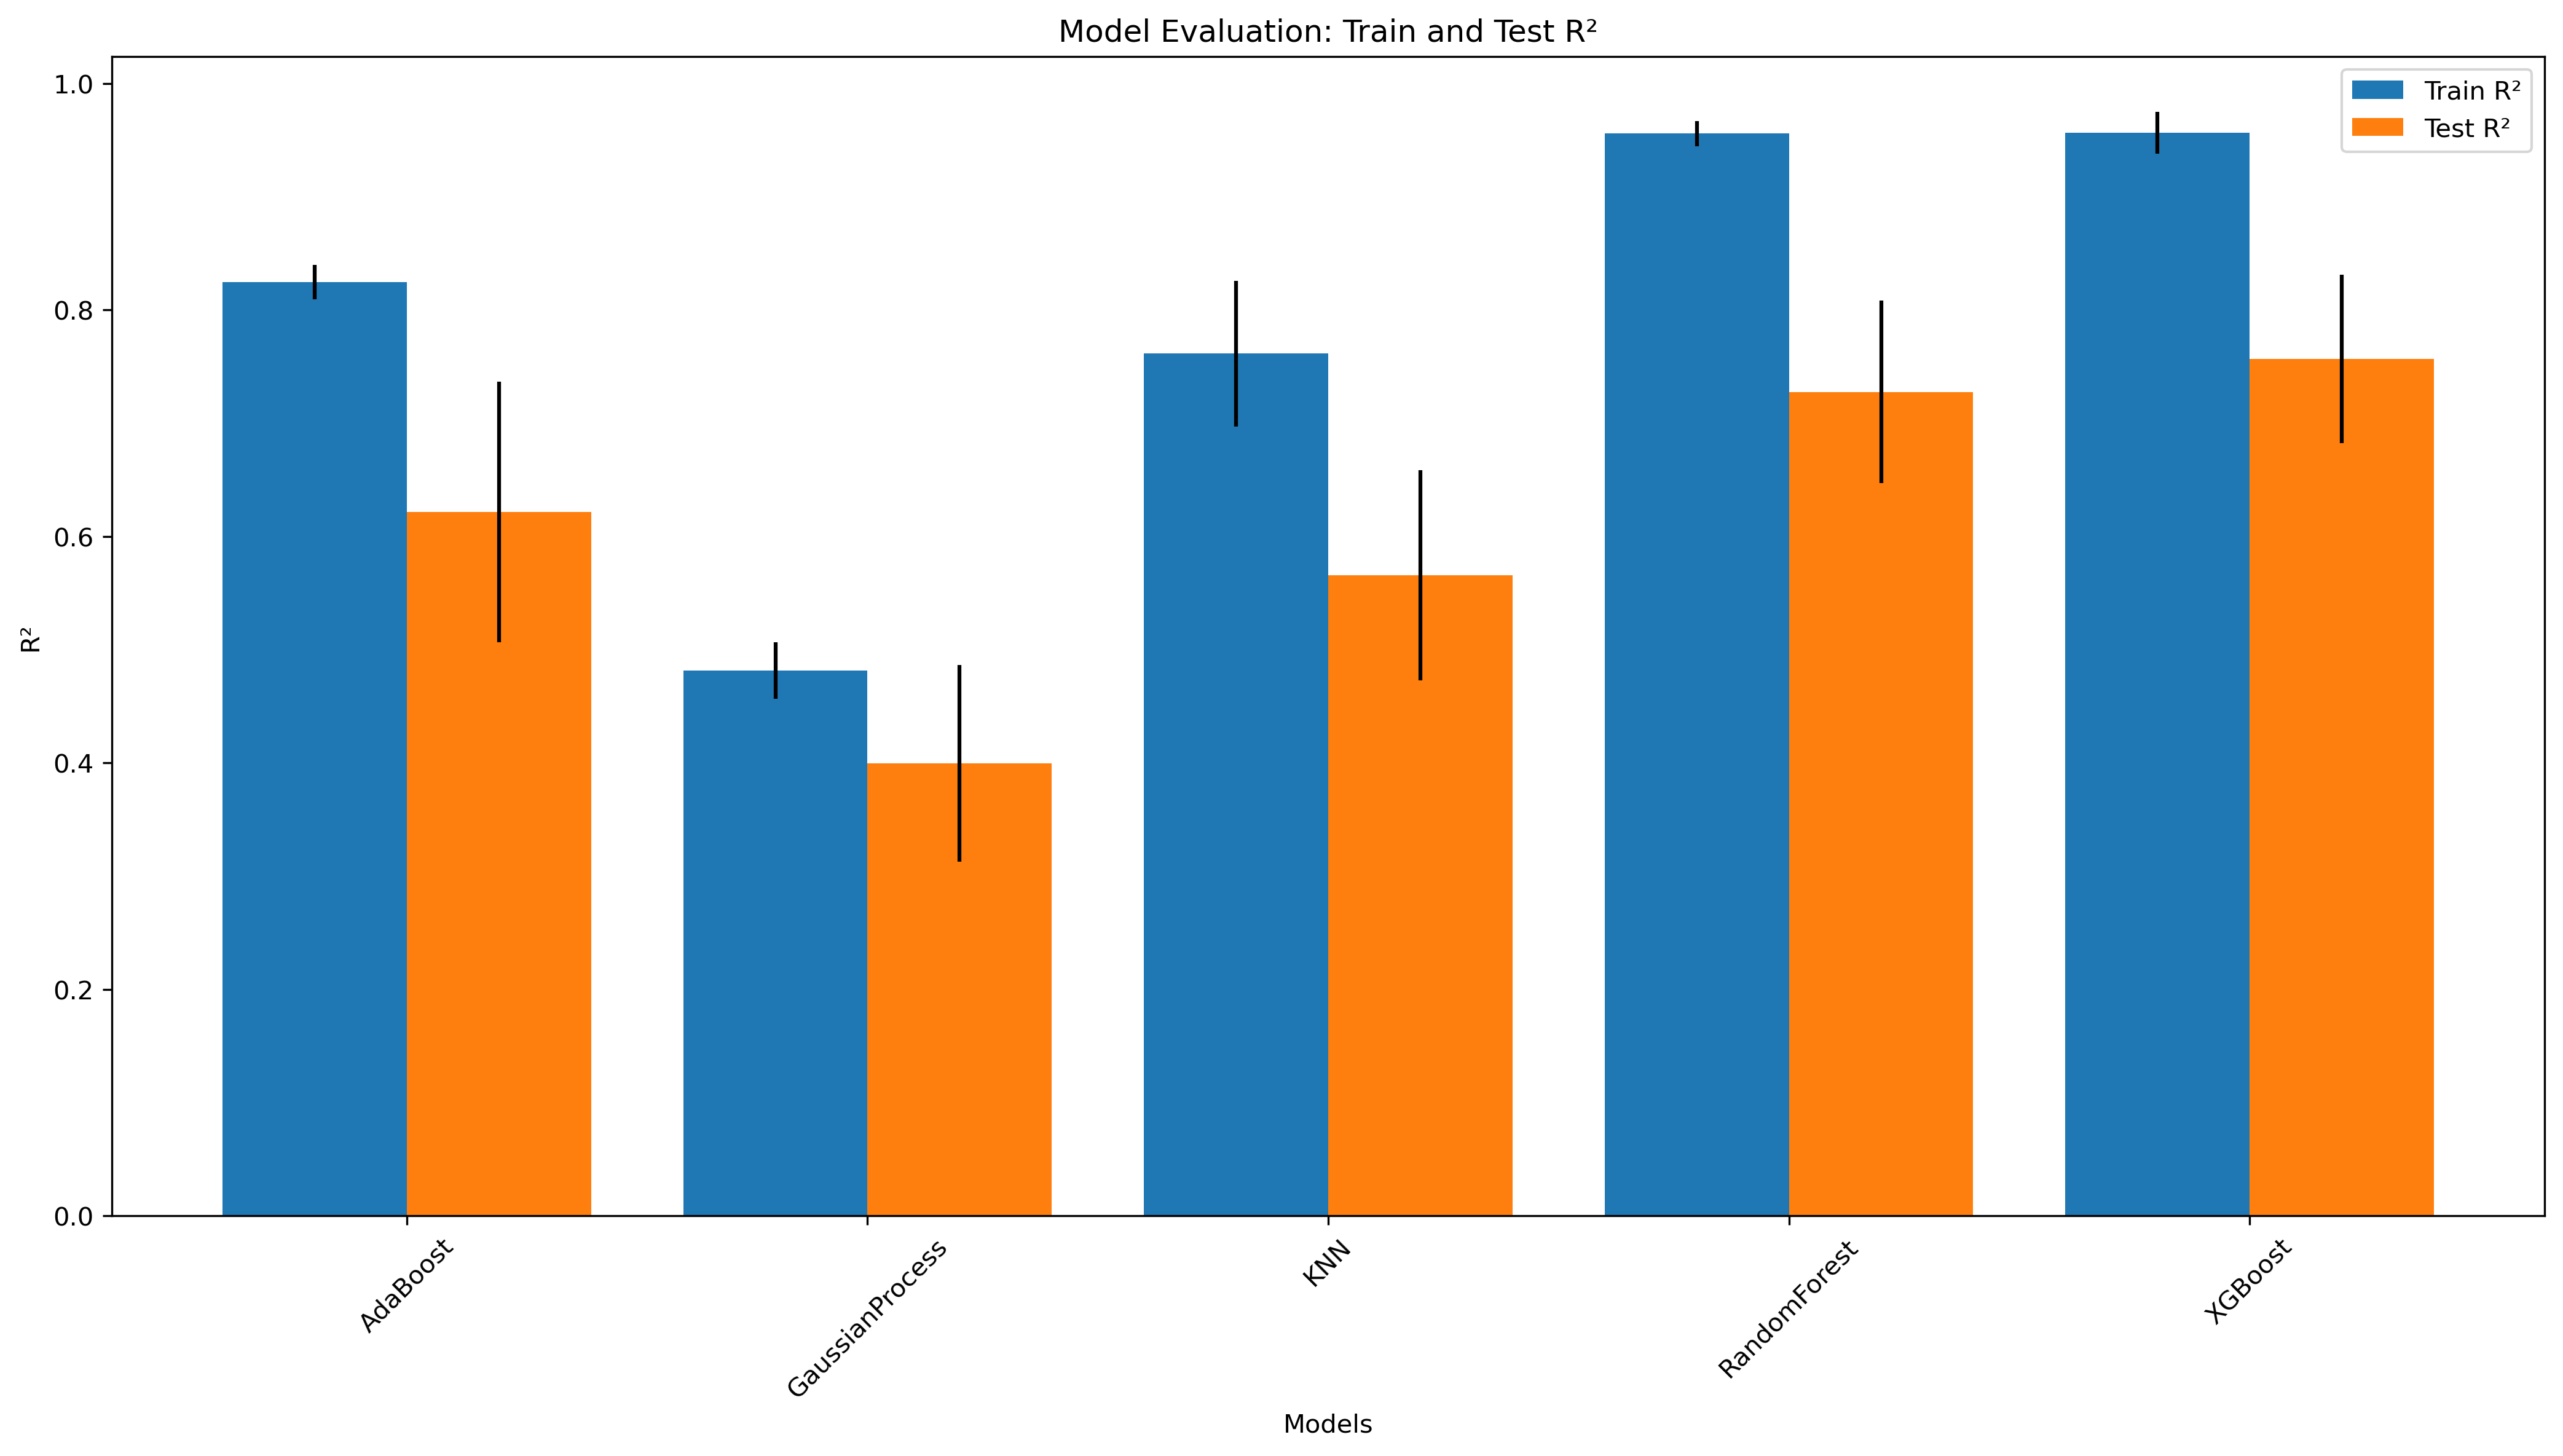

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('UTS.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('model_evaluation_results.xlsx', index=False)

# 可视化结果
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


0.7

             Model  Train_R2_Mean  Train_R2_Std  Test_R2_Mean  Test_R2_Std
0         AdaBoost       0.832187      0.018867      0.618207     0.093287
1  GaussianProcess       0.472476      0.033759      0.388581     0.078910
2              KNN       0.757790      0.086036      0.547257     0.088615
3     RandomForest       0.950710      0.017907      0.713706     0.073014
4          XGBoost       0.957768      0.019644      0.739242     0.073591


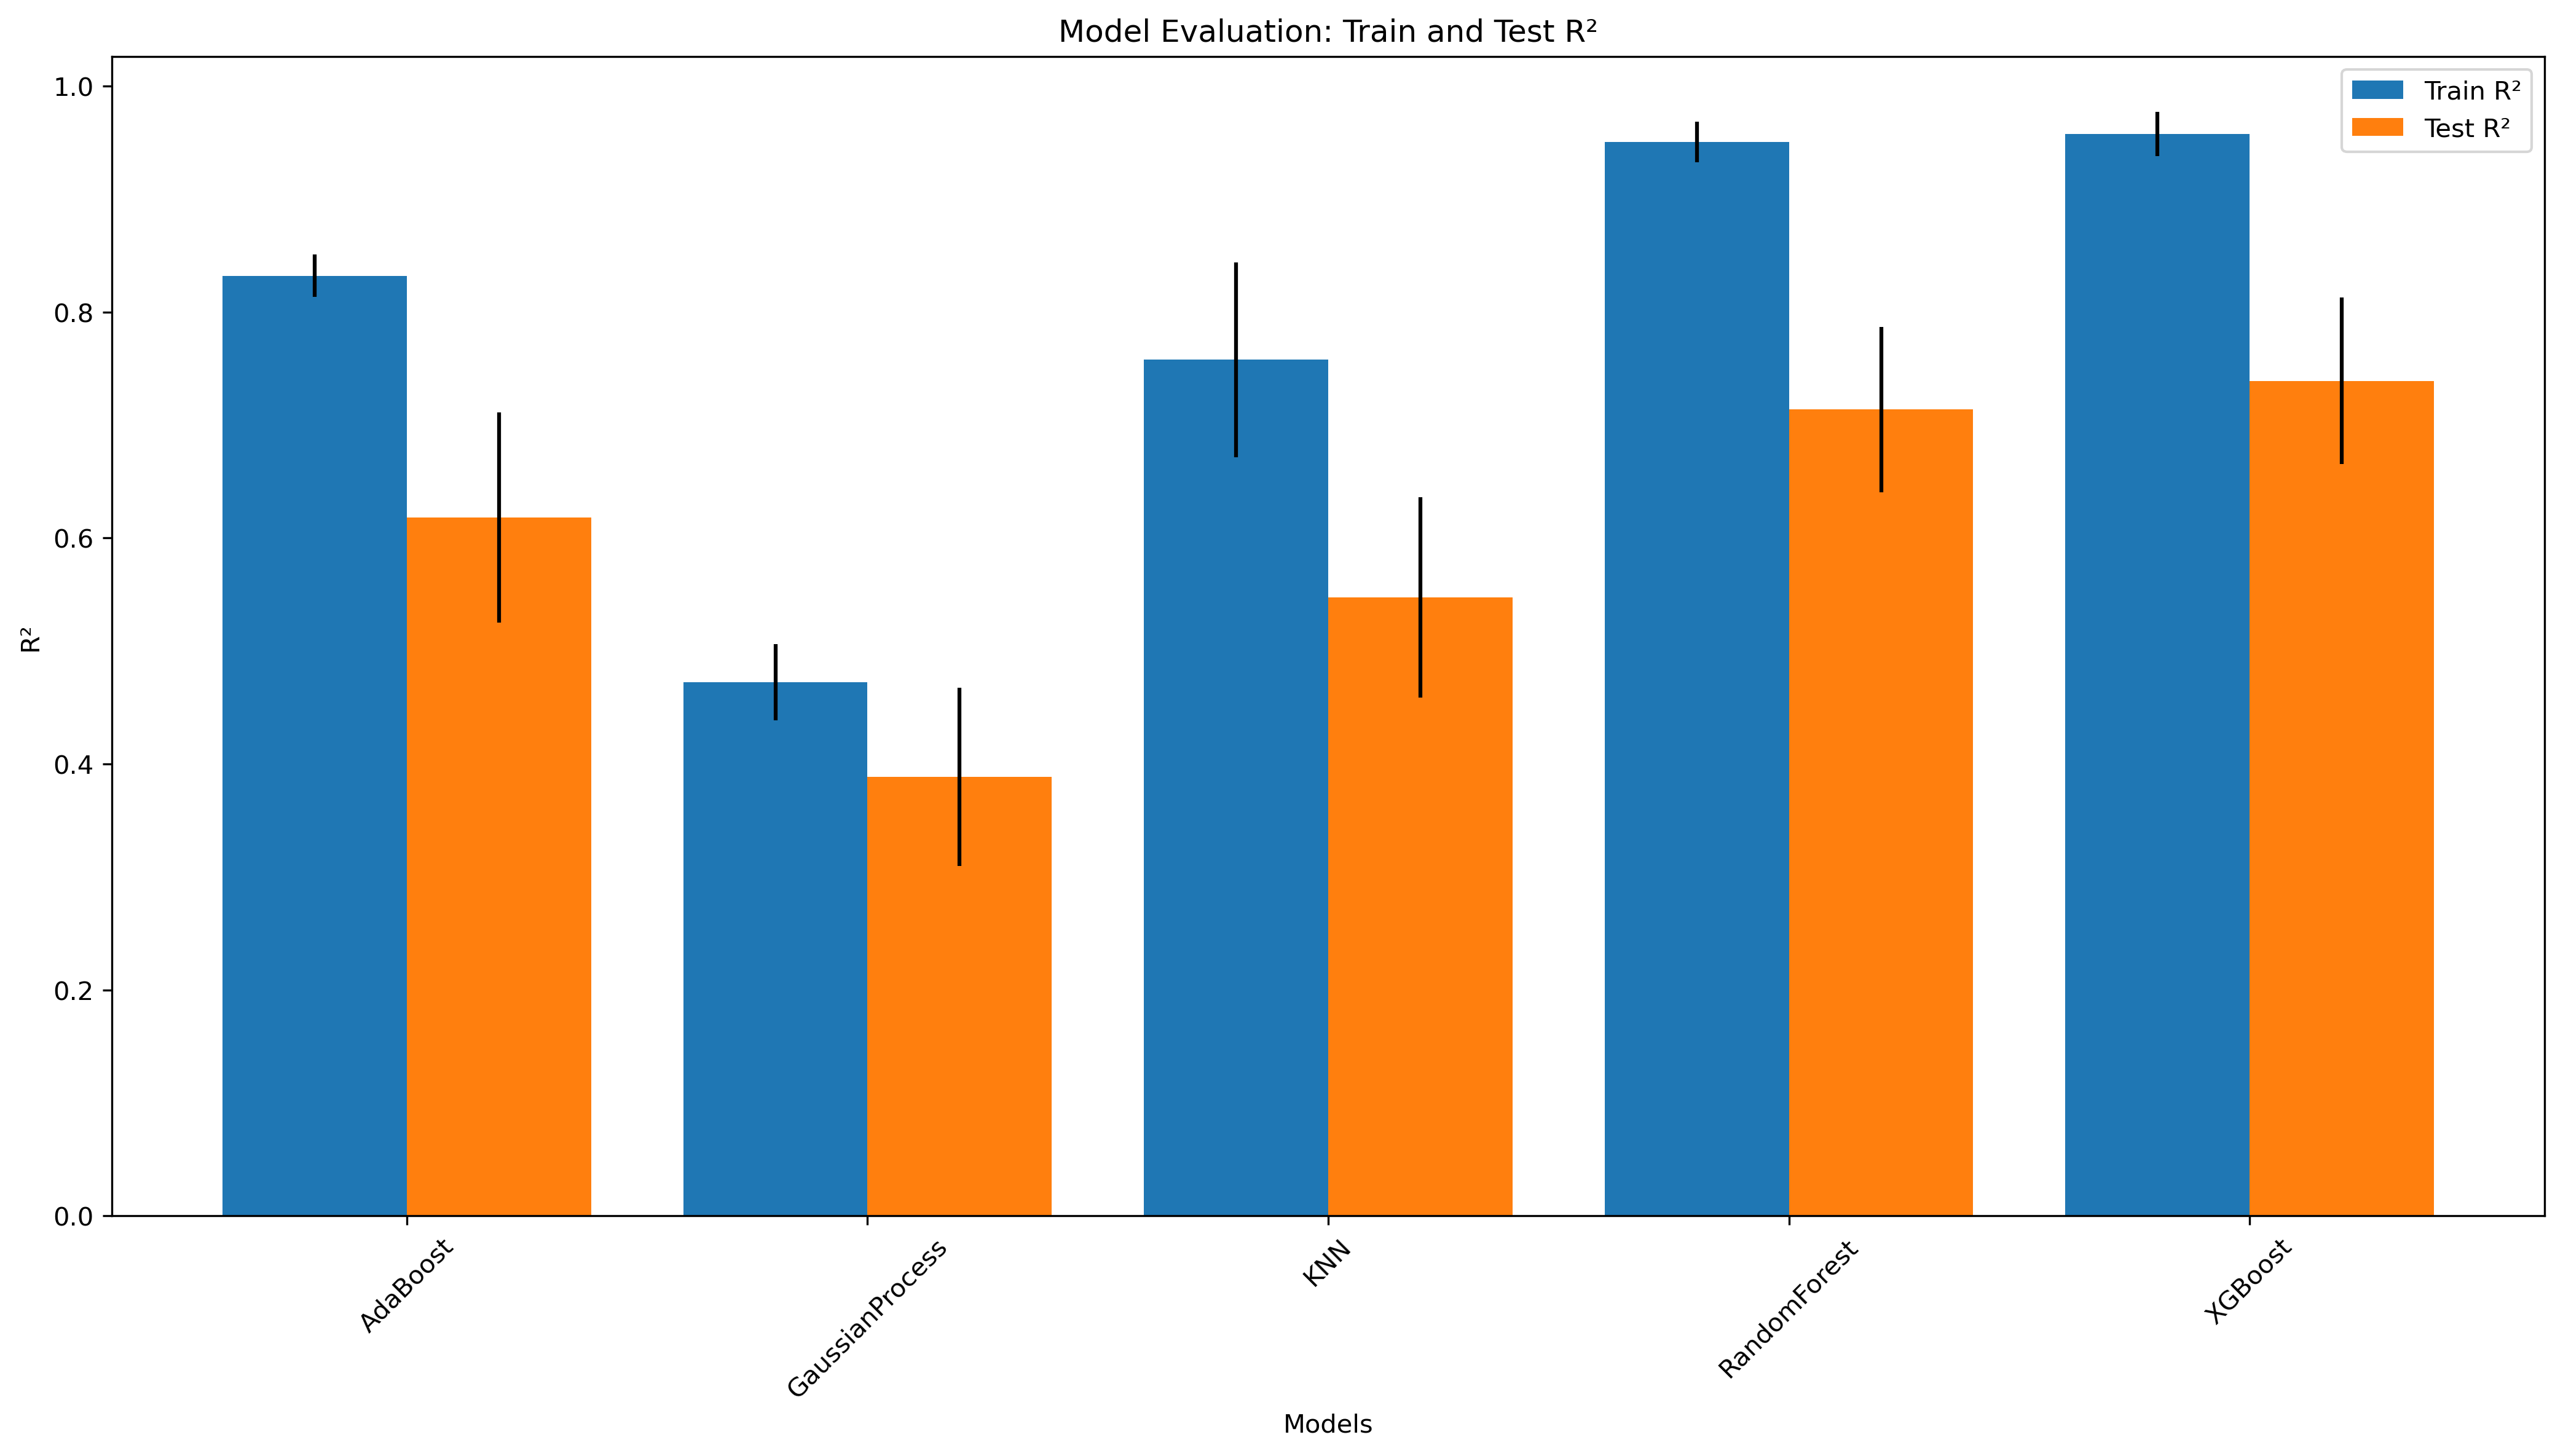

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('UTS.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('model_evaluation_results.xlsx', index=False)

# 计算平均值和标准差
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

# 输出平均值和标准差
print(summary_df)

# 可视化结果
plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [50]:
#0.6

             Model  Train_R2_Mean  Train_R2_Std  Test_R2_Mean  Test_R2_Std
0         AdaBoost       0.847293      0.015862      0.608070     0.090403
1  GaussianProcess       0.462984      0.042756      0.347300     0.120136
2              KNN       0.743128      0.108798      0.520023     0.084673
3     RandomForest       0.941392      0.031305      0.688617     0.068252
4          XGBoost       0.949391      0.026129      0.708222     0.068466


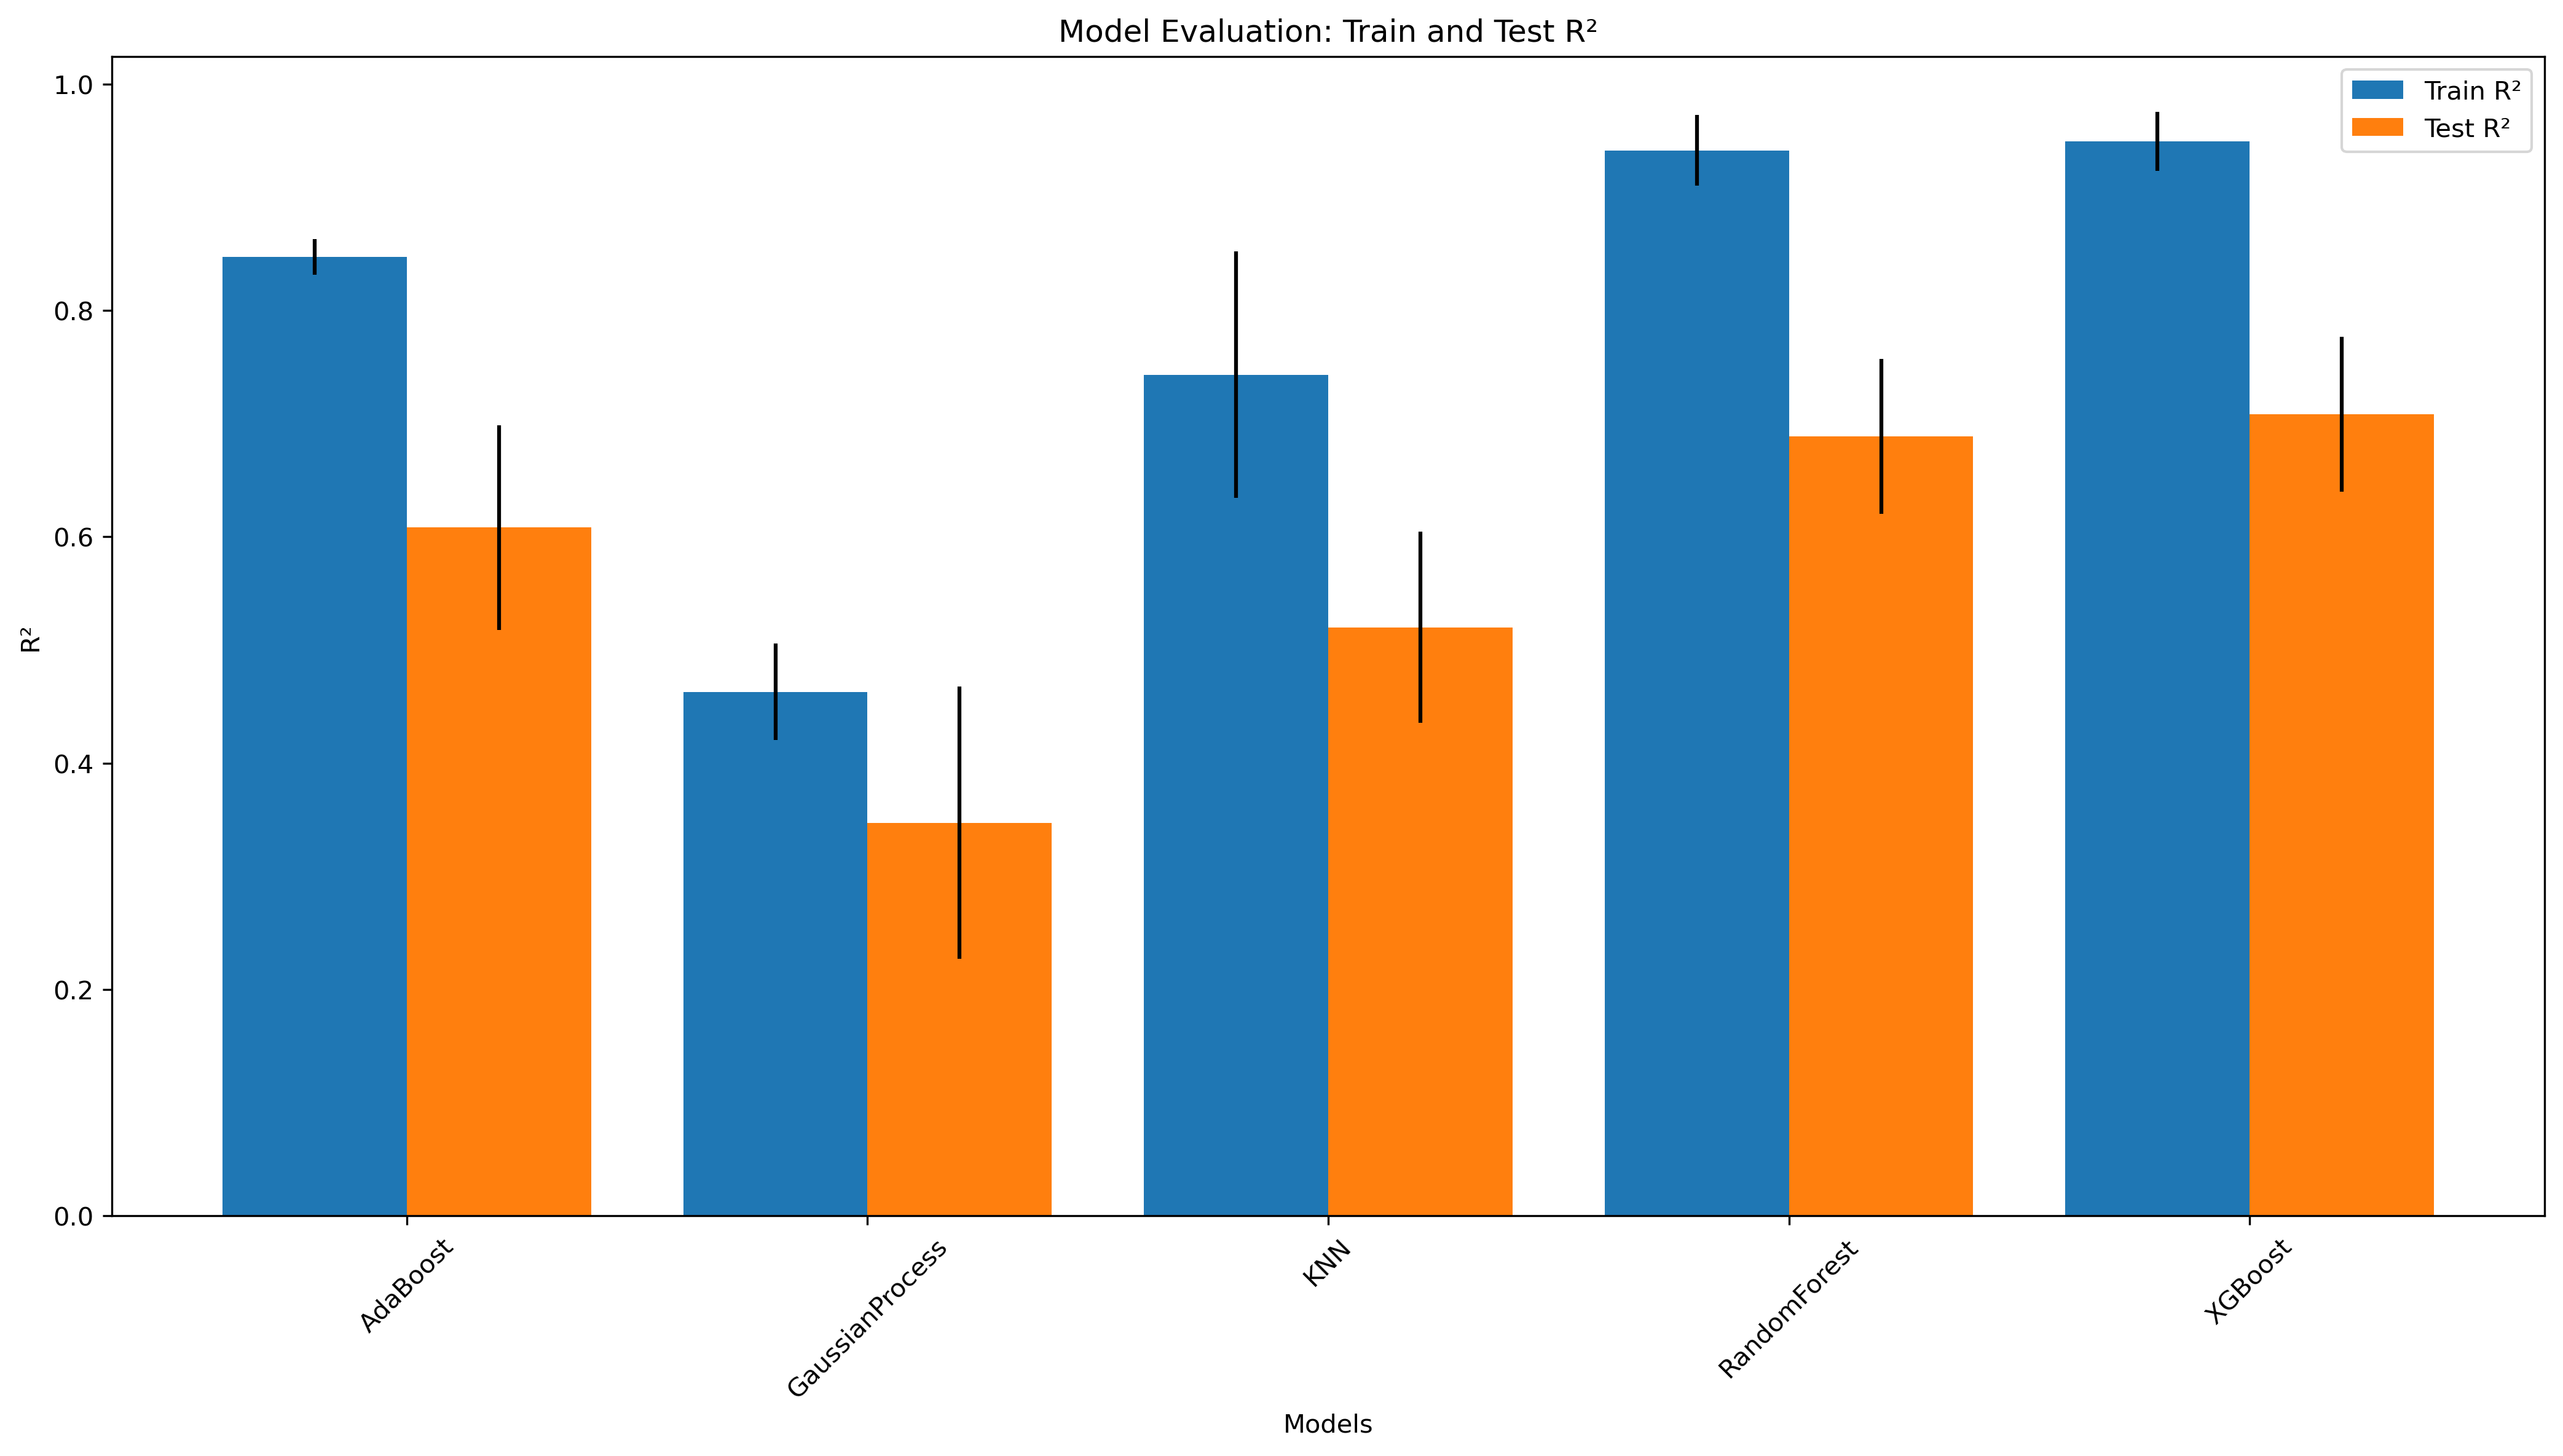

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('UTS.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('model_evaluation_results.xlsx', index=False)

# 计算平均值和标准差
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

# 输出平均值和标准差
print(summary_df)

# 可视化结果
plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [52]:
#0.5

             Model  Train_R2_Mean  Train_R2_Std  Test_R2_Mean  Test_R2_Std
0         AdaBoost       0.860625      0.018481      0.594620     0.083278
1  GaussianProcess       0.453004      0.049165      0.302831     0.158664
2              KNN       0.731736      0.129256      0.494576     0.070895
3     RandomForest       0.937063      0.035217      0.674614     0.057011
4          XGBoost       0.944653      0.041256      0.689370     0.056863


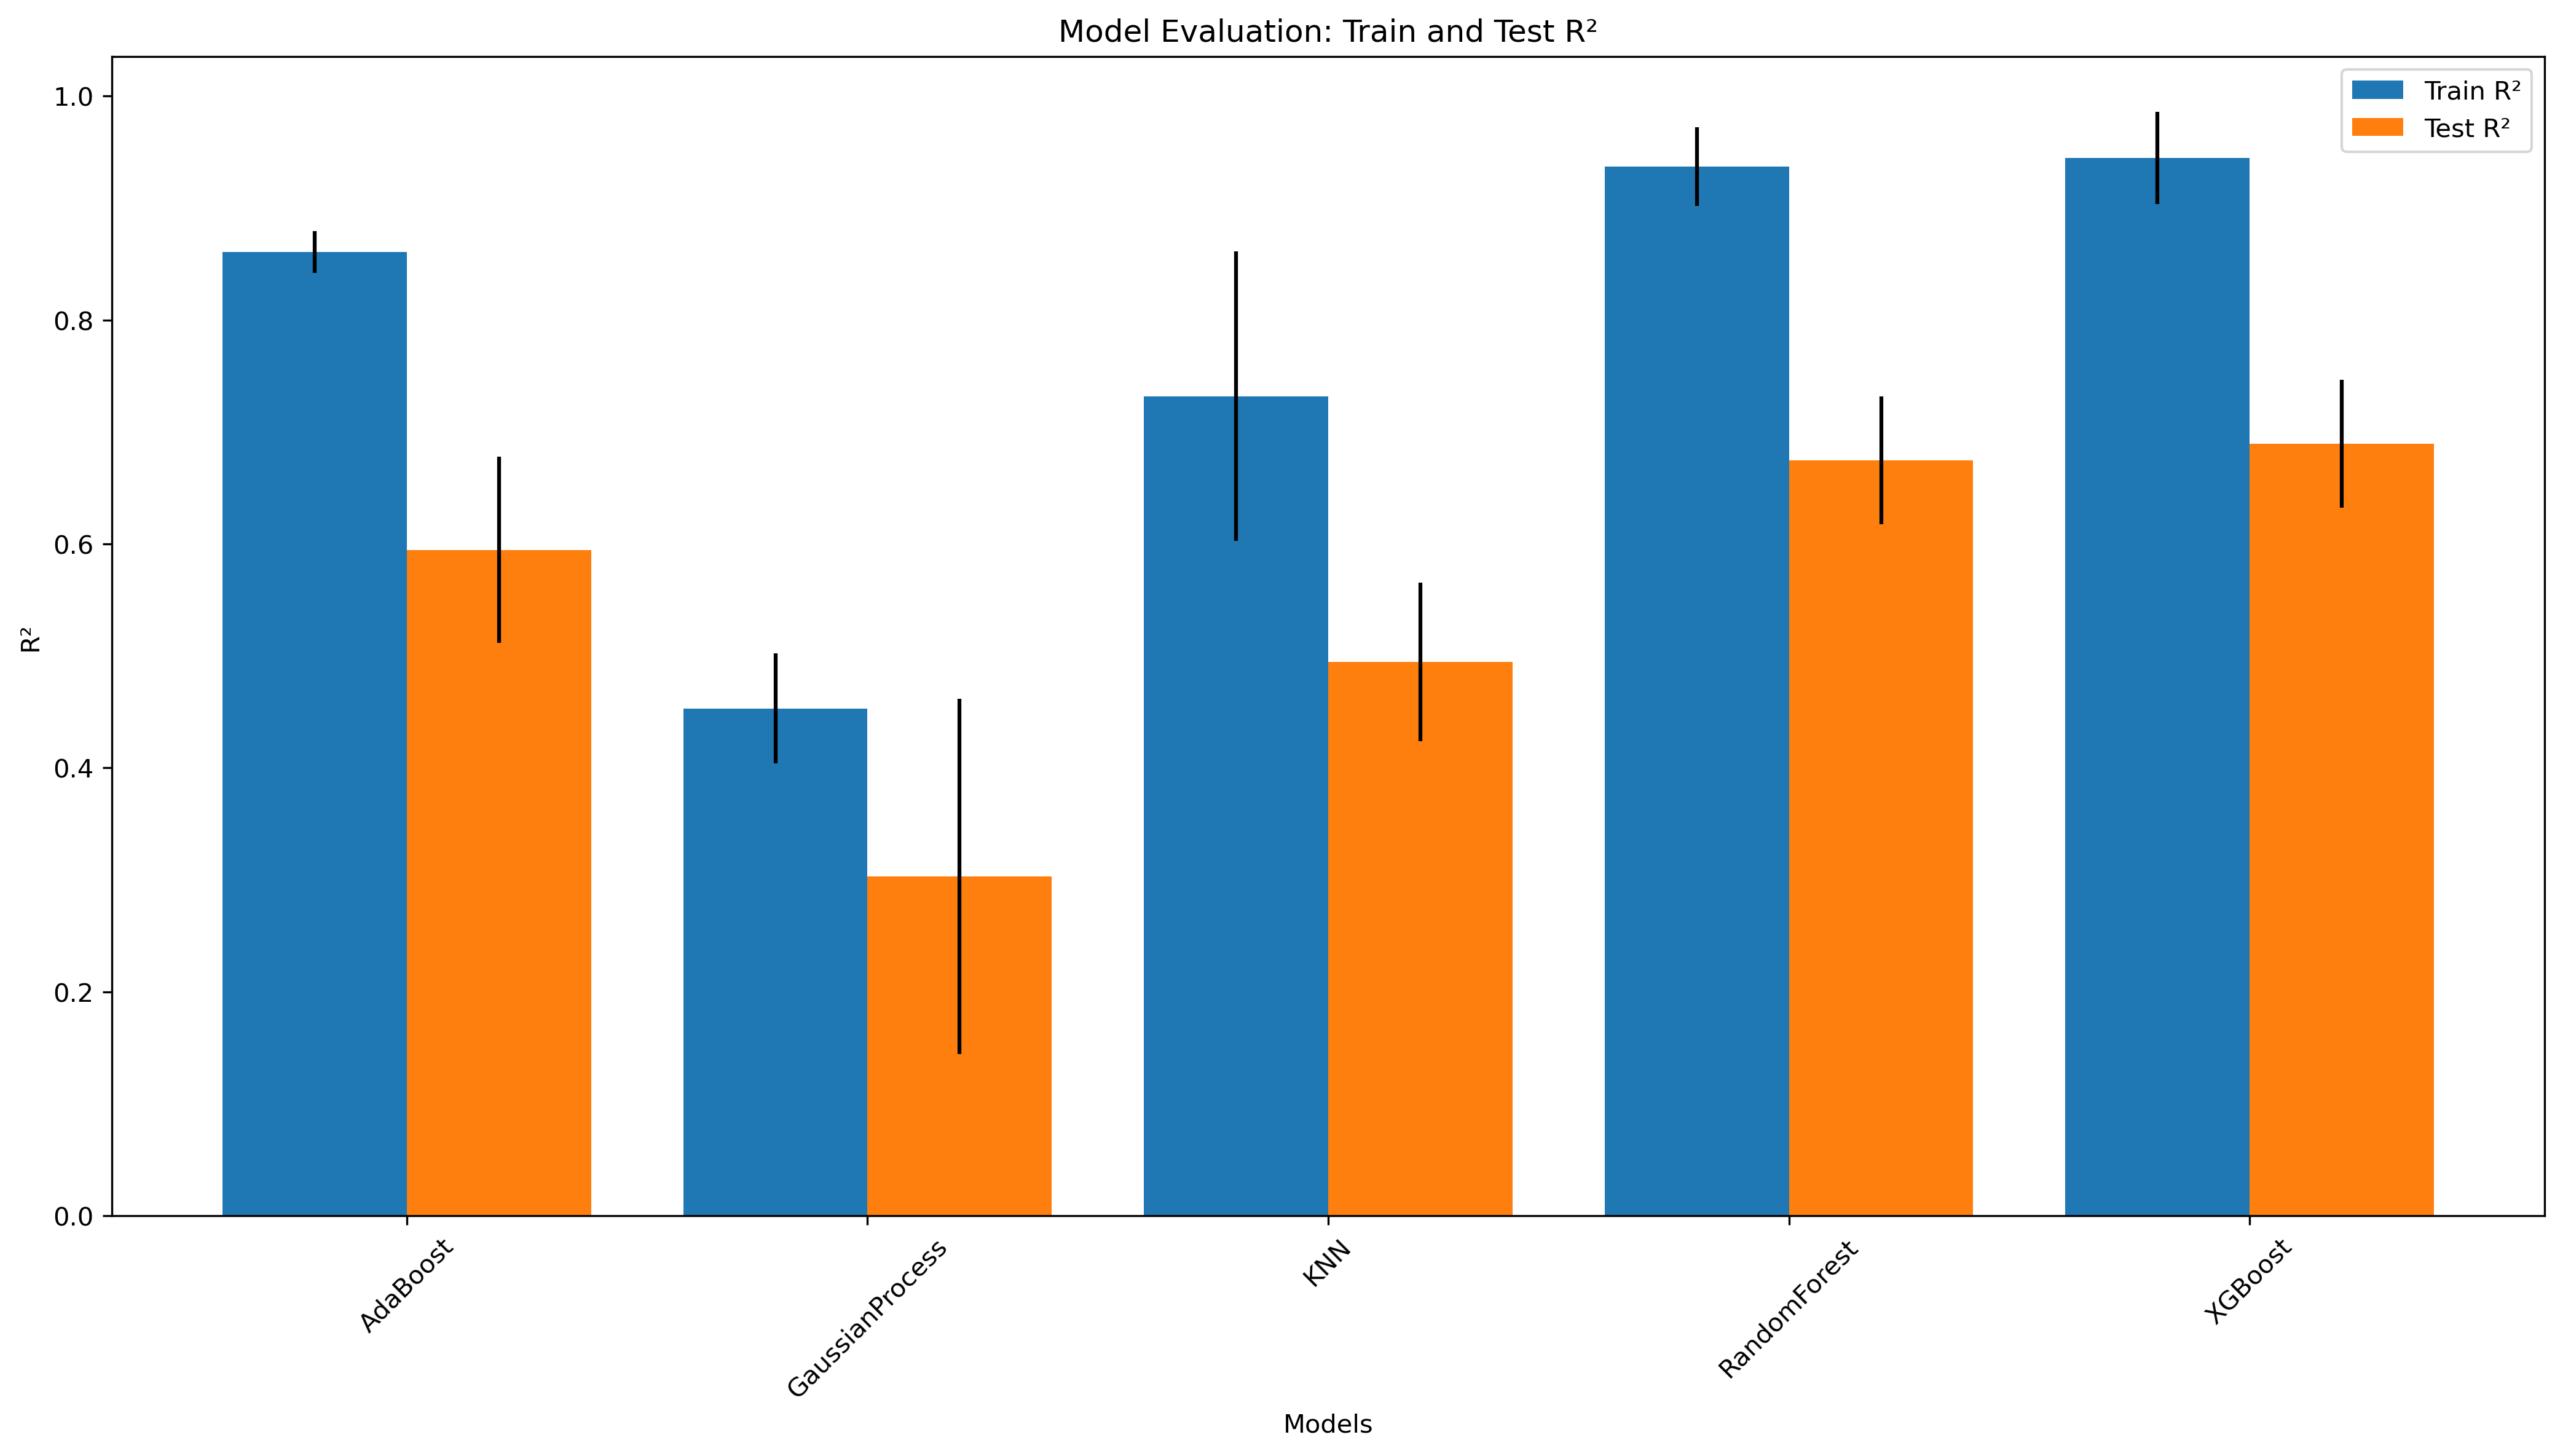

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('UTS.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('model_evaluation_results.xlsx', index=False)

# 计算平均值和标准差
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

# 输出平均值和标准差
print(summary_df)

# 可视化结果
plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [54]:
#0.4

             Model  Train_R2_Mean  Train_R2_Std  Test_R2_Mean  Test_R2_Std
0         AdaBoost       0.879394      0.019787      0.578315     0.085406
1  GaussianProcess       0.427255      0.058517      0.226592     0.247870
2              KNN       0.718802      0.149199      0.460067     0.083747
3     RandomForest       0.920793      0.045789      0.642265     0.062124
4          XGBoost       0.931293      0.065100      0.648527     0.079591


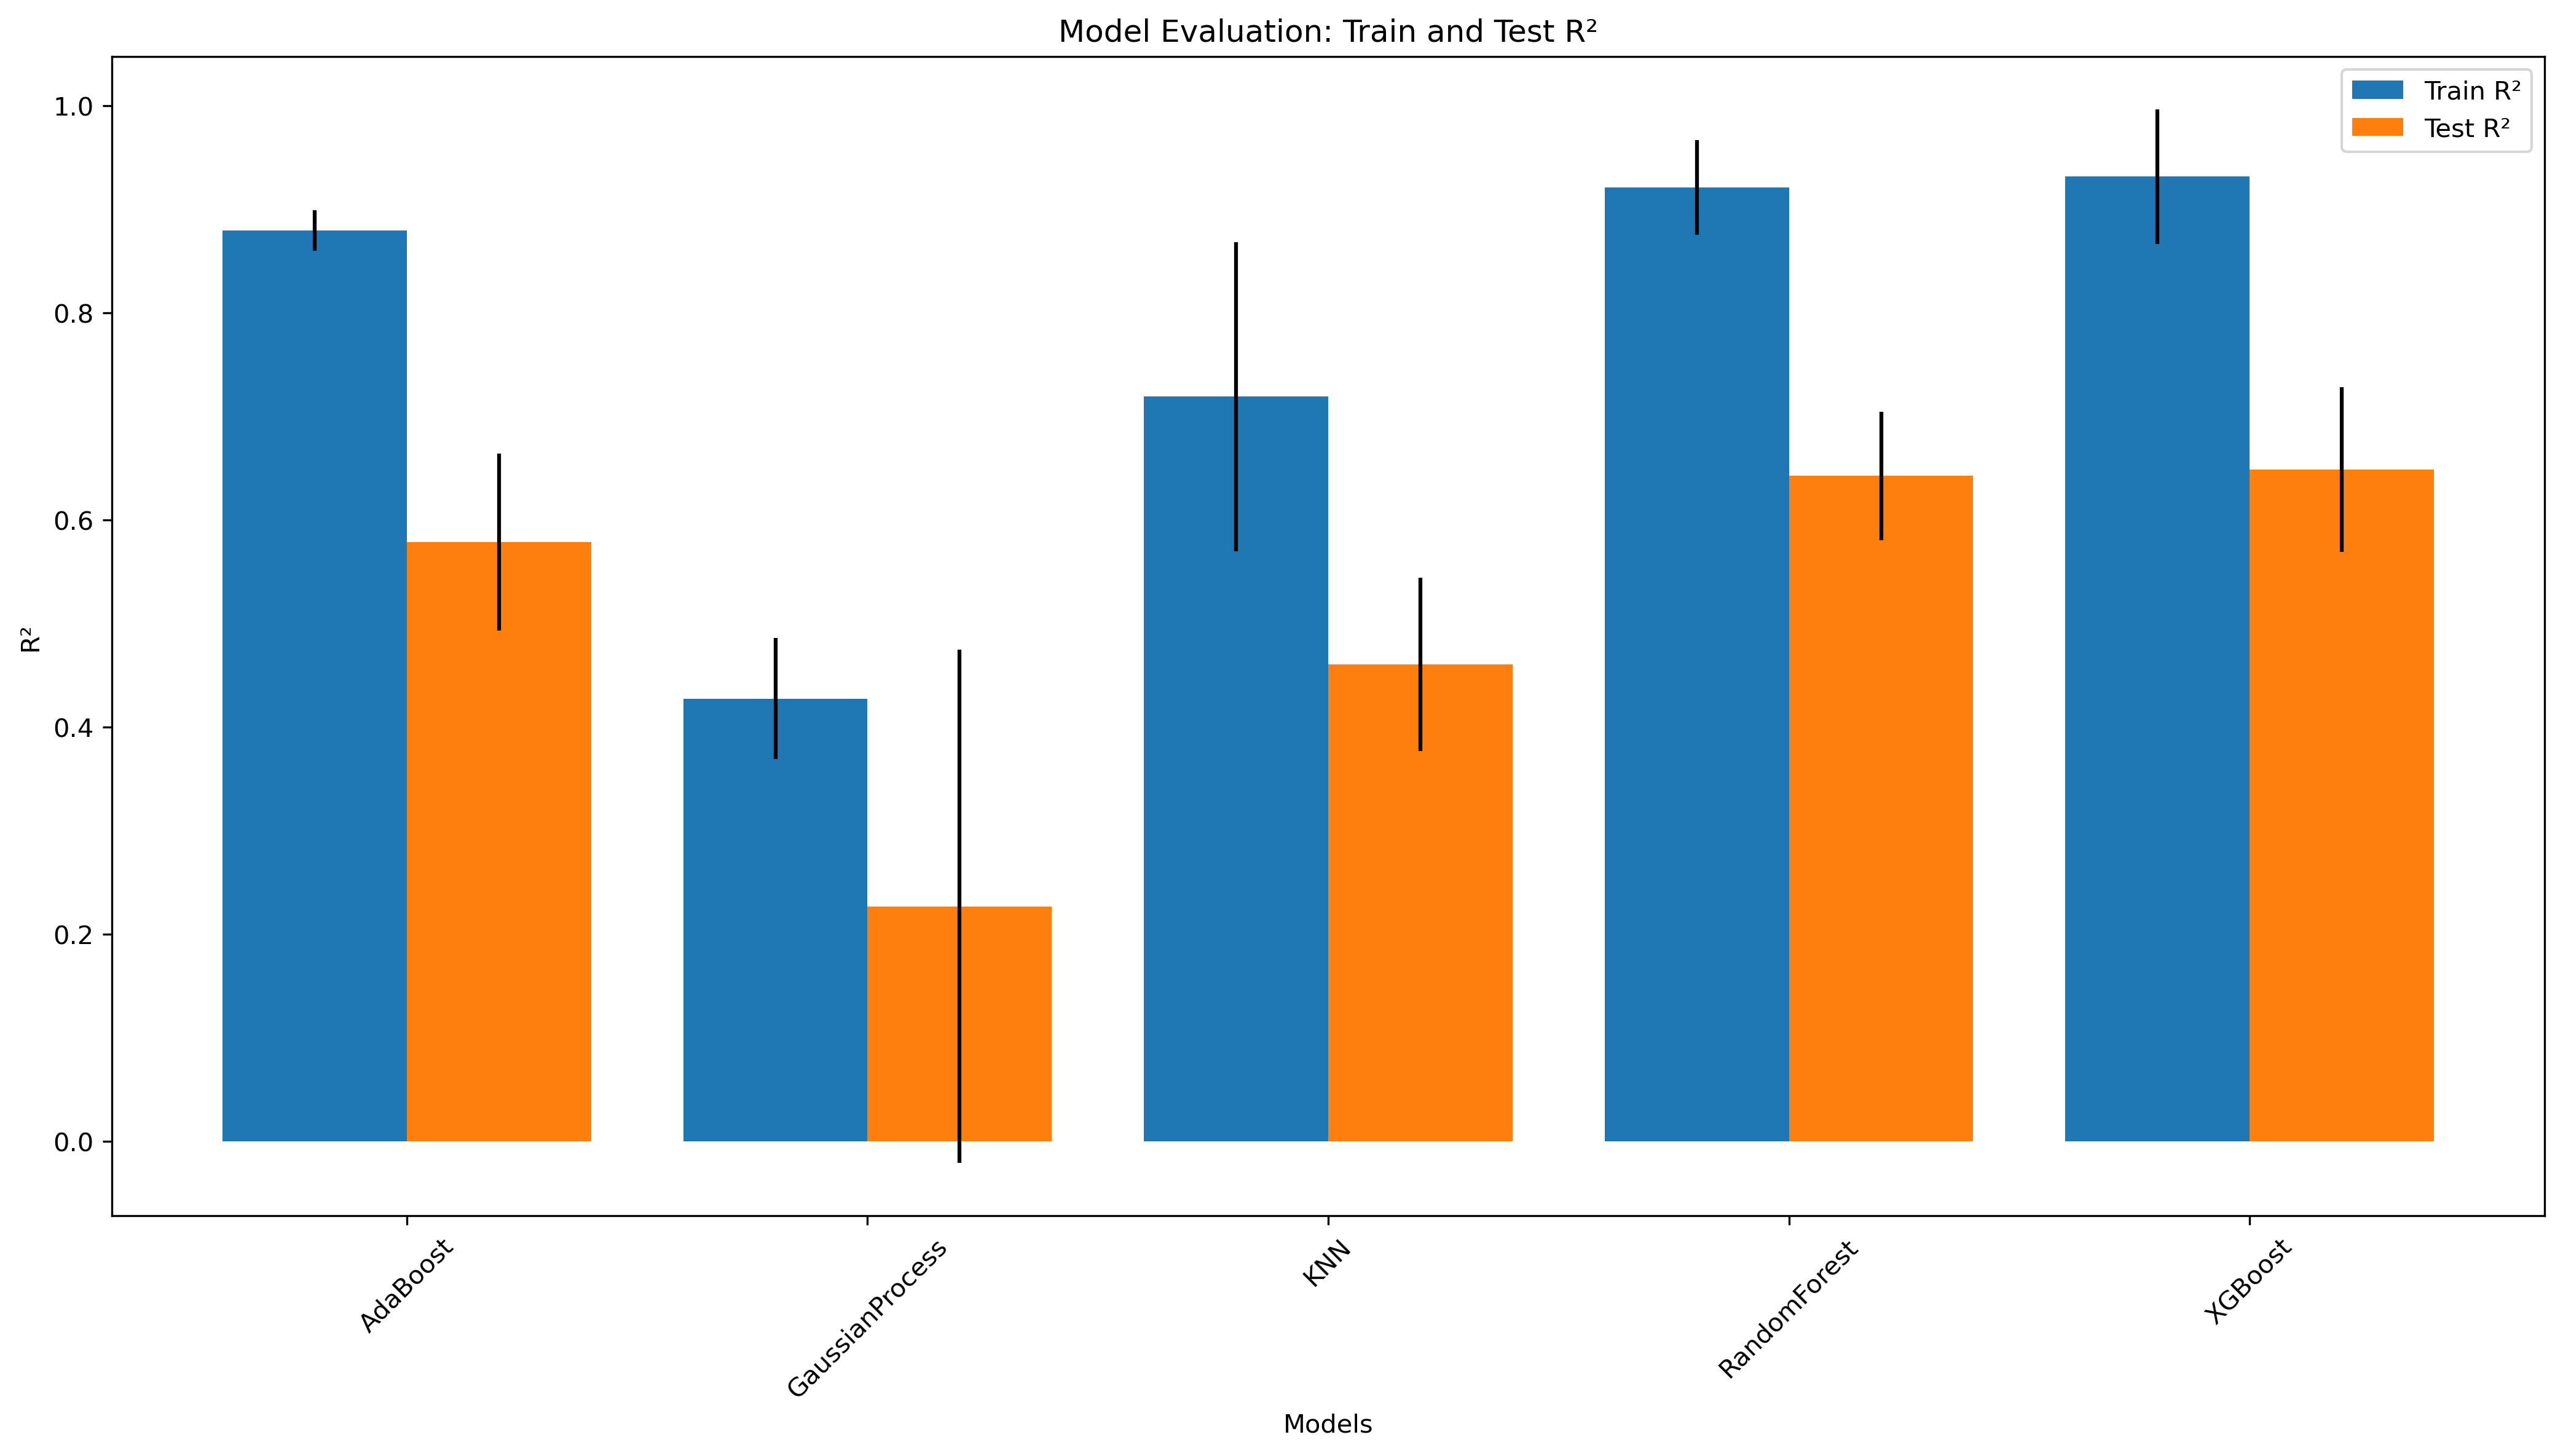

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('UTS.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.6, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('model_evaluation_results.xlsx', index=False)

# 计算平均值和标准差
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

# 输出平均值和标准差
print(summary_df)

# 可视化结果
plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [56]:
#0.3

             Model  Train_R2_Mean  Train_R2_Std  Test_R2_Mean  Test_R2_Std
0         AdaBoost       0.905321      0.020443      0.536409     0.083288
1  GaussianProcess       0.378166      0.076570      0.114618     0.299017
2              KNN       0.653727      0.203171      0.404361     0.081422
3     RandomForest       0.892155      0.062617      0.594585     0.061799
4          XGBoost       0.907294      0.094484      0.592622     0.083360


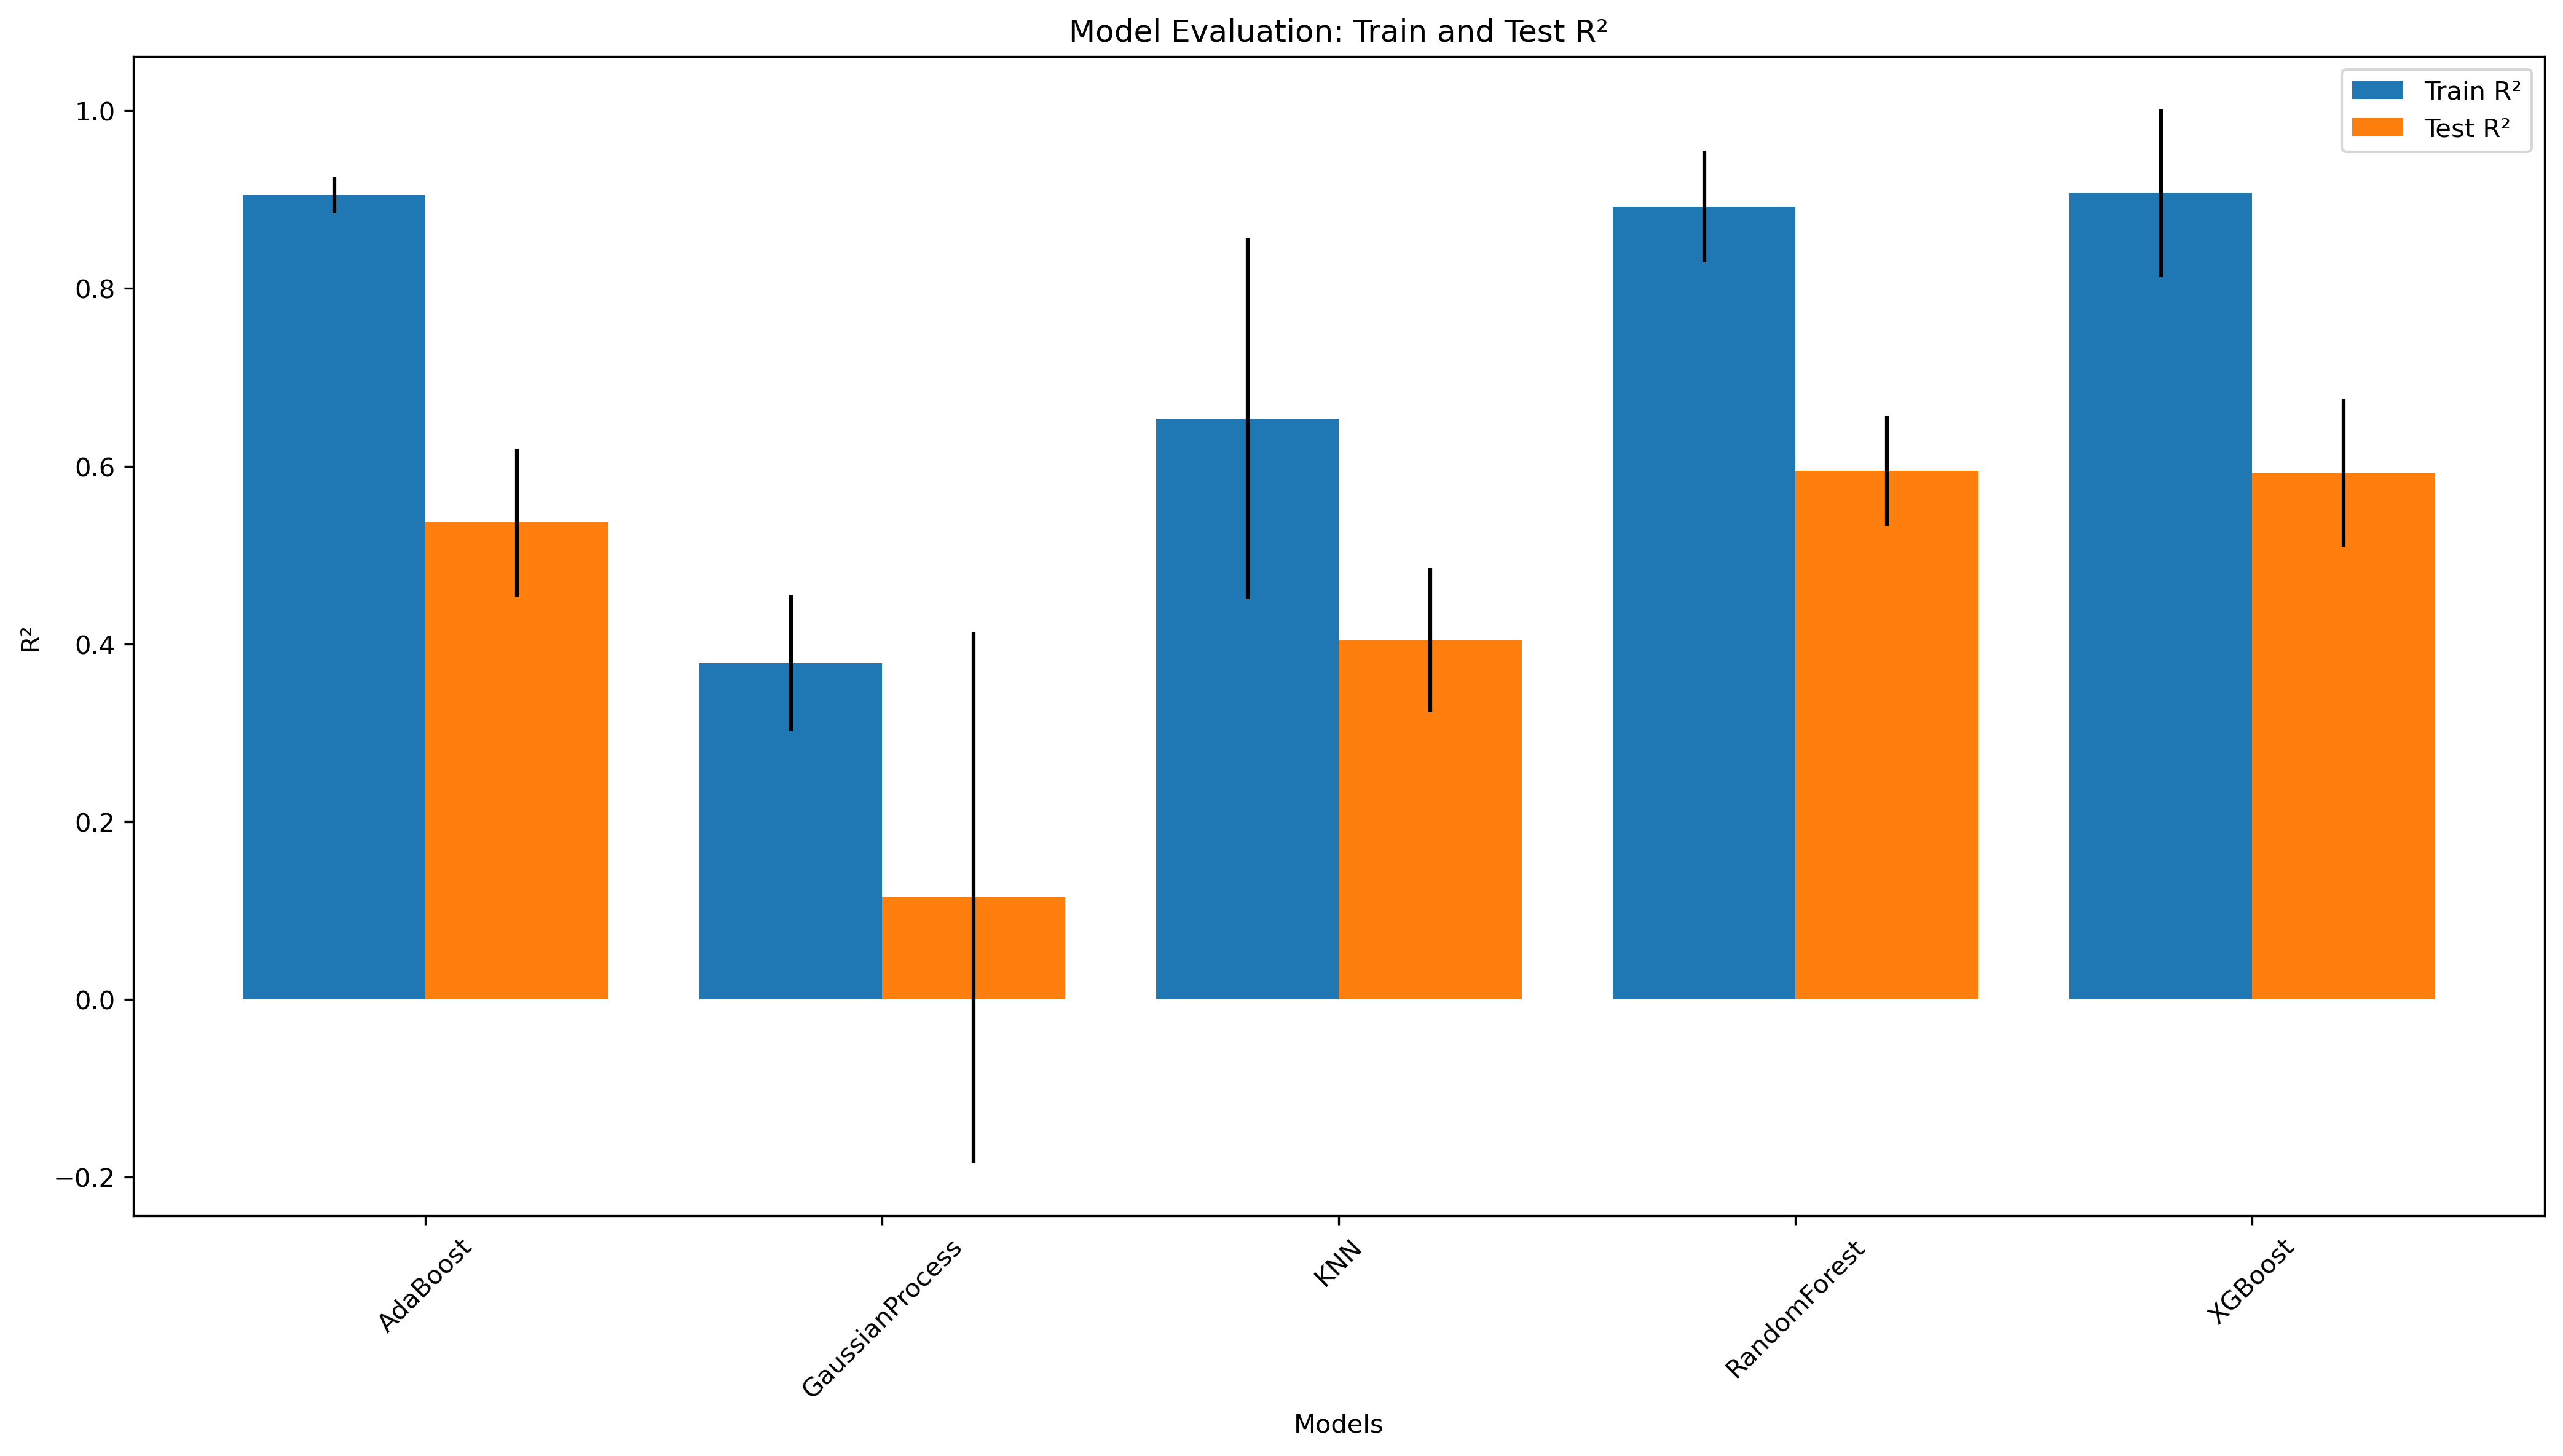

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('UTS.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('model_evaluation_results.xlsx', index=False)

# 计算平均值和标准差
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

# 输出平均值和标准差
print(summary_df)

# 可视化结果
plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [58]:
#0.9

             Model  Train_R2_Mean  Train_R2_Std  Test_R2_Mean  Test_R2_Std
0         AdaBoost       0.814204      0.011718      0.628808     0.137665
1  GaussianProcess       0.486124      0.014829      0.397540     0.149987
2              KNN       0.763391      0.058704      0.566204     0.156584
3     RandomForest       0.956367      0.011129      0.740330     0.100968
4          XGBoost       0.959465      0.007522      0.756378     0.120231


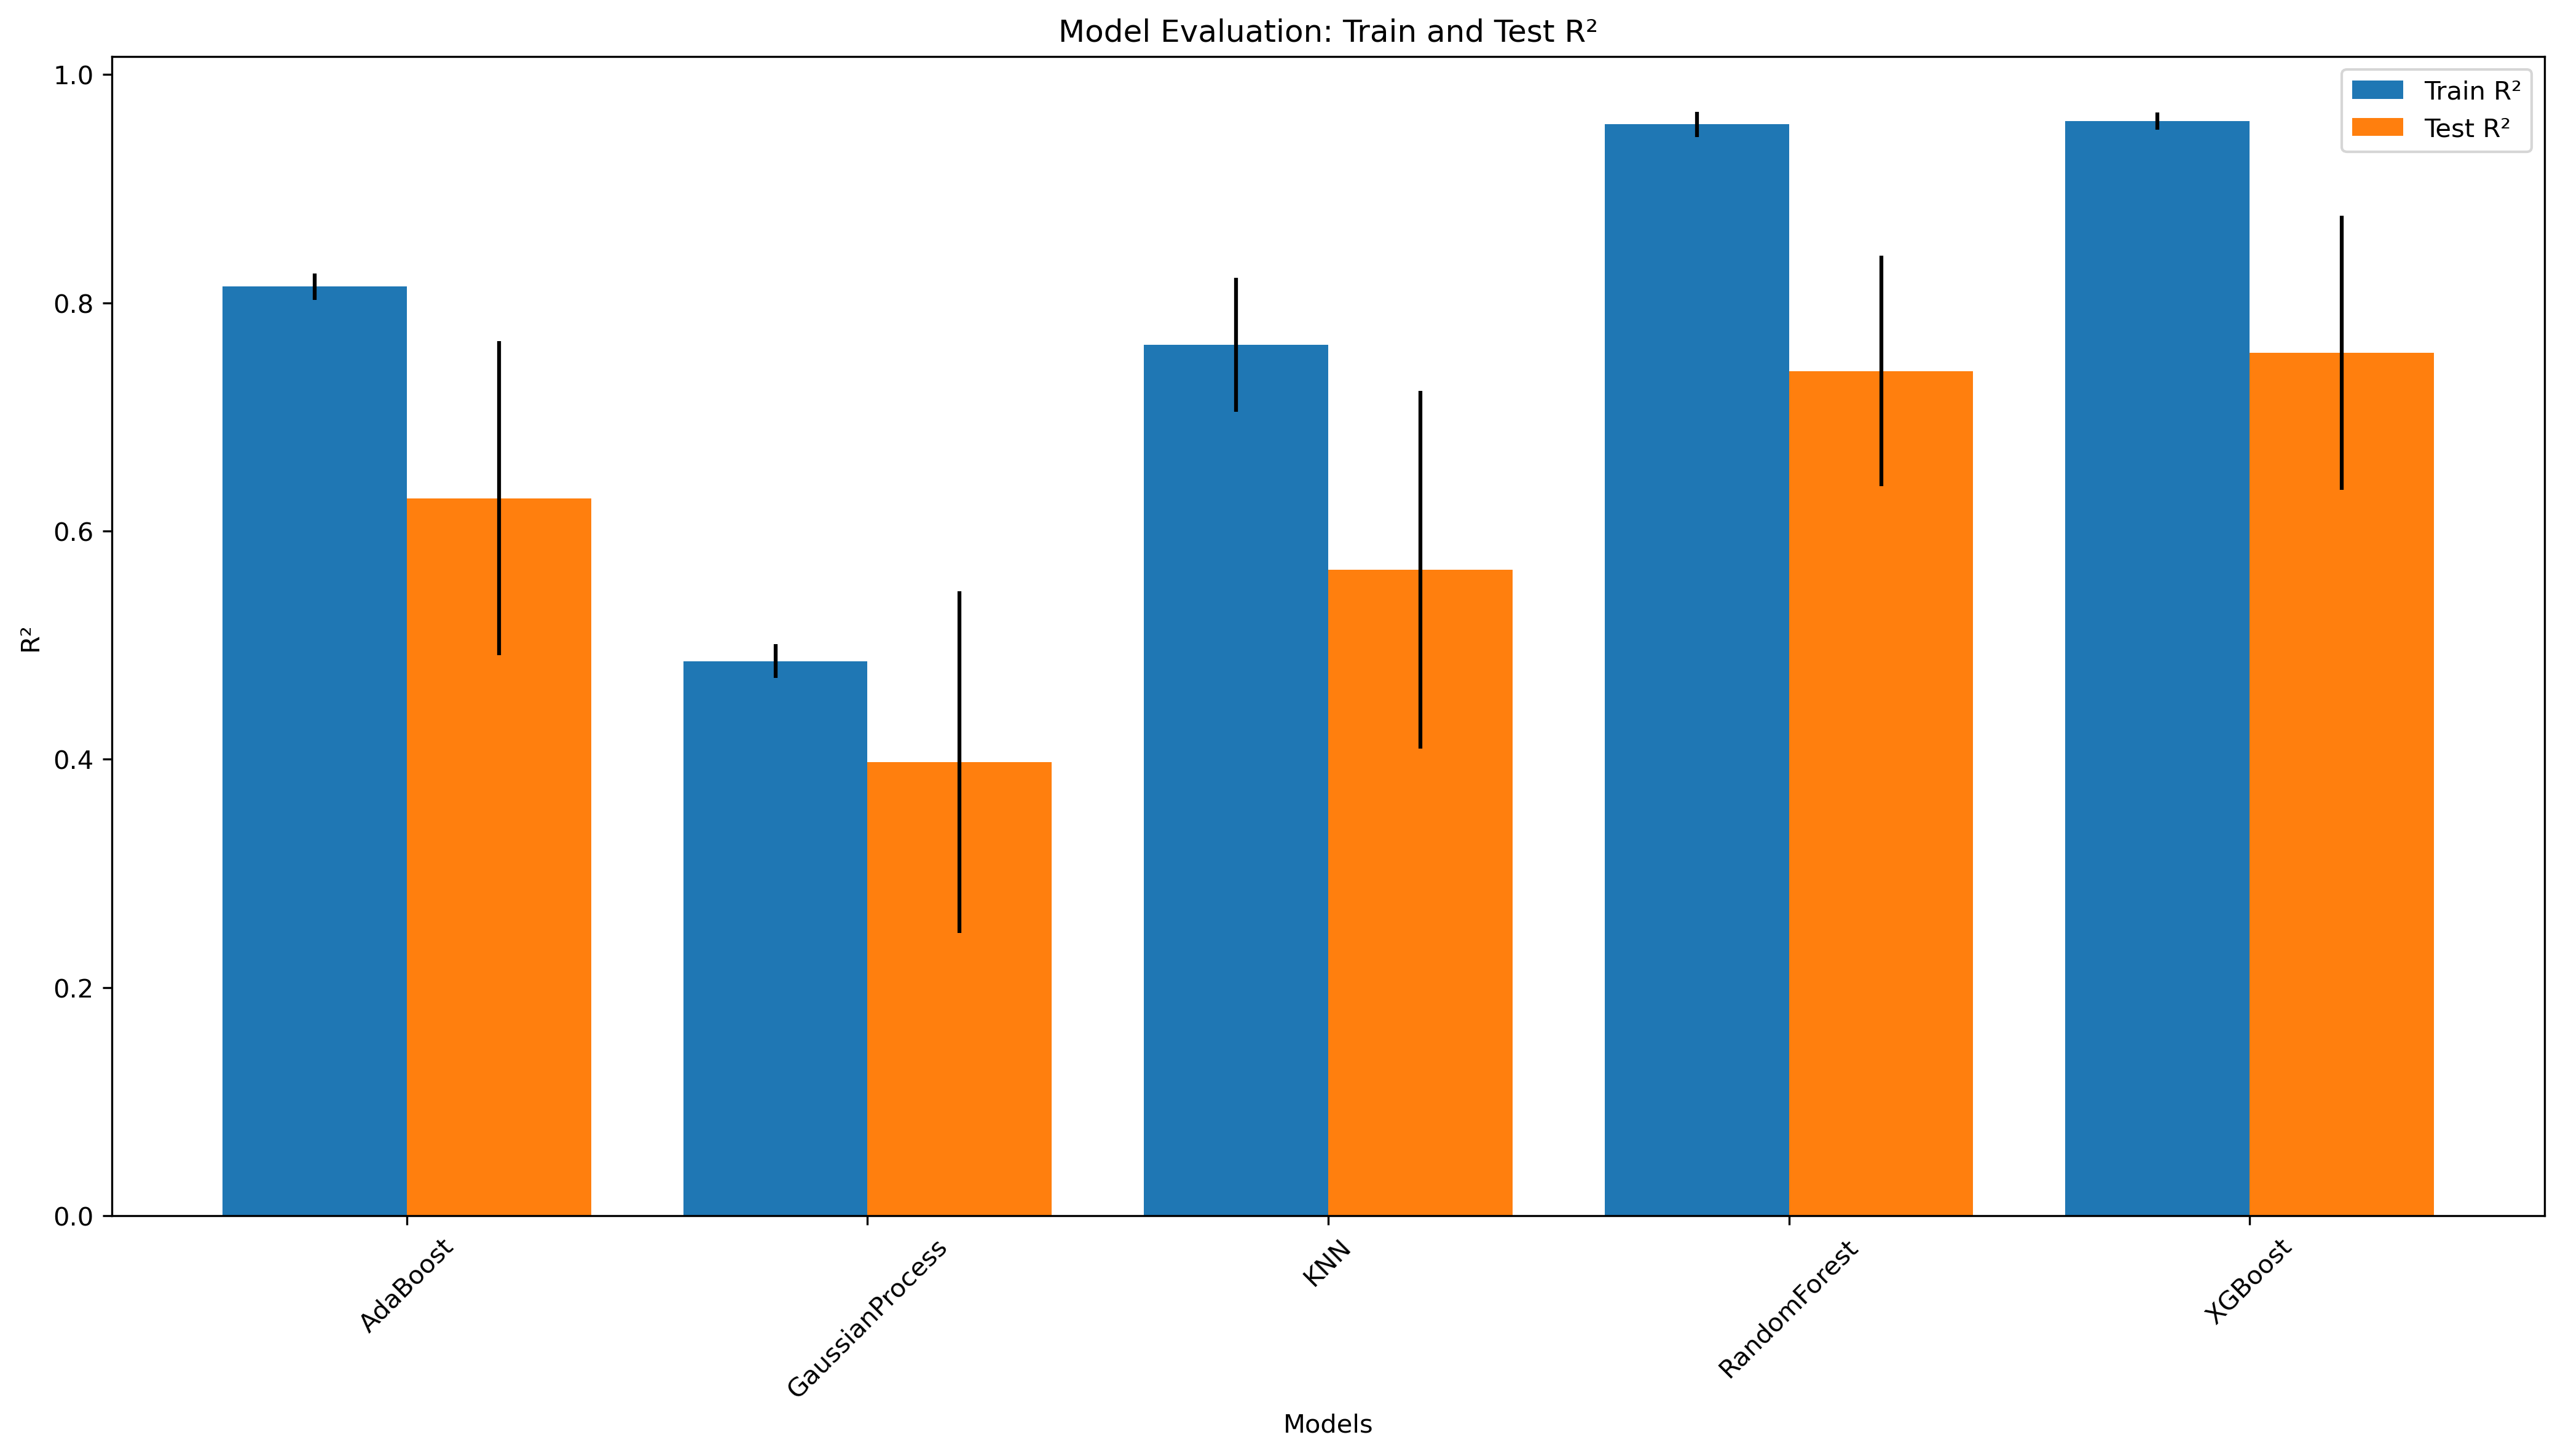

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('UTS.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('model_evaluation_results.xlsx', index=False)

# 计算平均值和标准差
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

# 输出平均值和标准差
print(summary_df)

# 可视化结果
plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
#0.8

             Model  Train_R2_Mean  Train_R2_Std  Test_R2_Mean  Test_R2_Std
0         AdaBoost       0.824398      0.015217      0.621394     0.115023
1  GaussianProcess       0.481547      0.024972      0.399638     0.086788
2              KNN       0.761326      0.064334      0.565749     0.092778
3     RandomForest       0.953849      0.013509      0.729138     0.081946
4          XGBoost       0.956414      0.018576      0.756569     0.074409


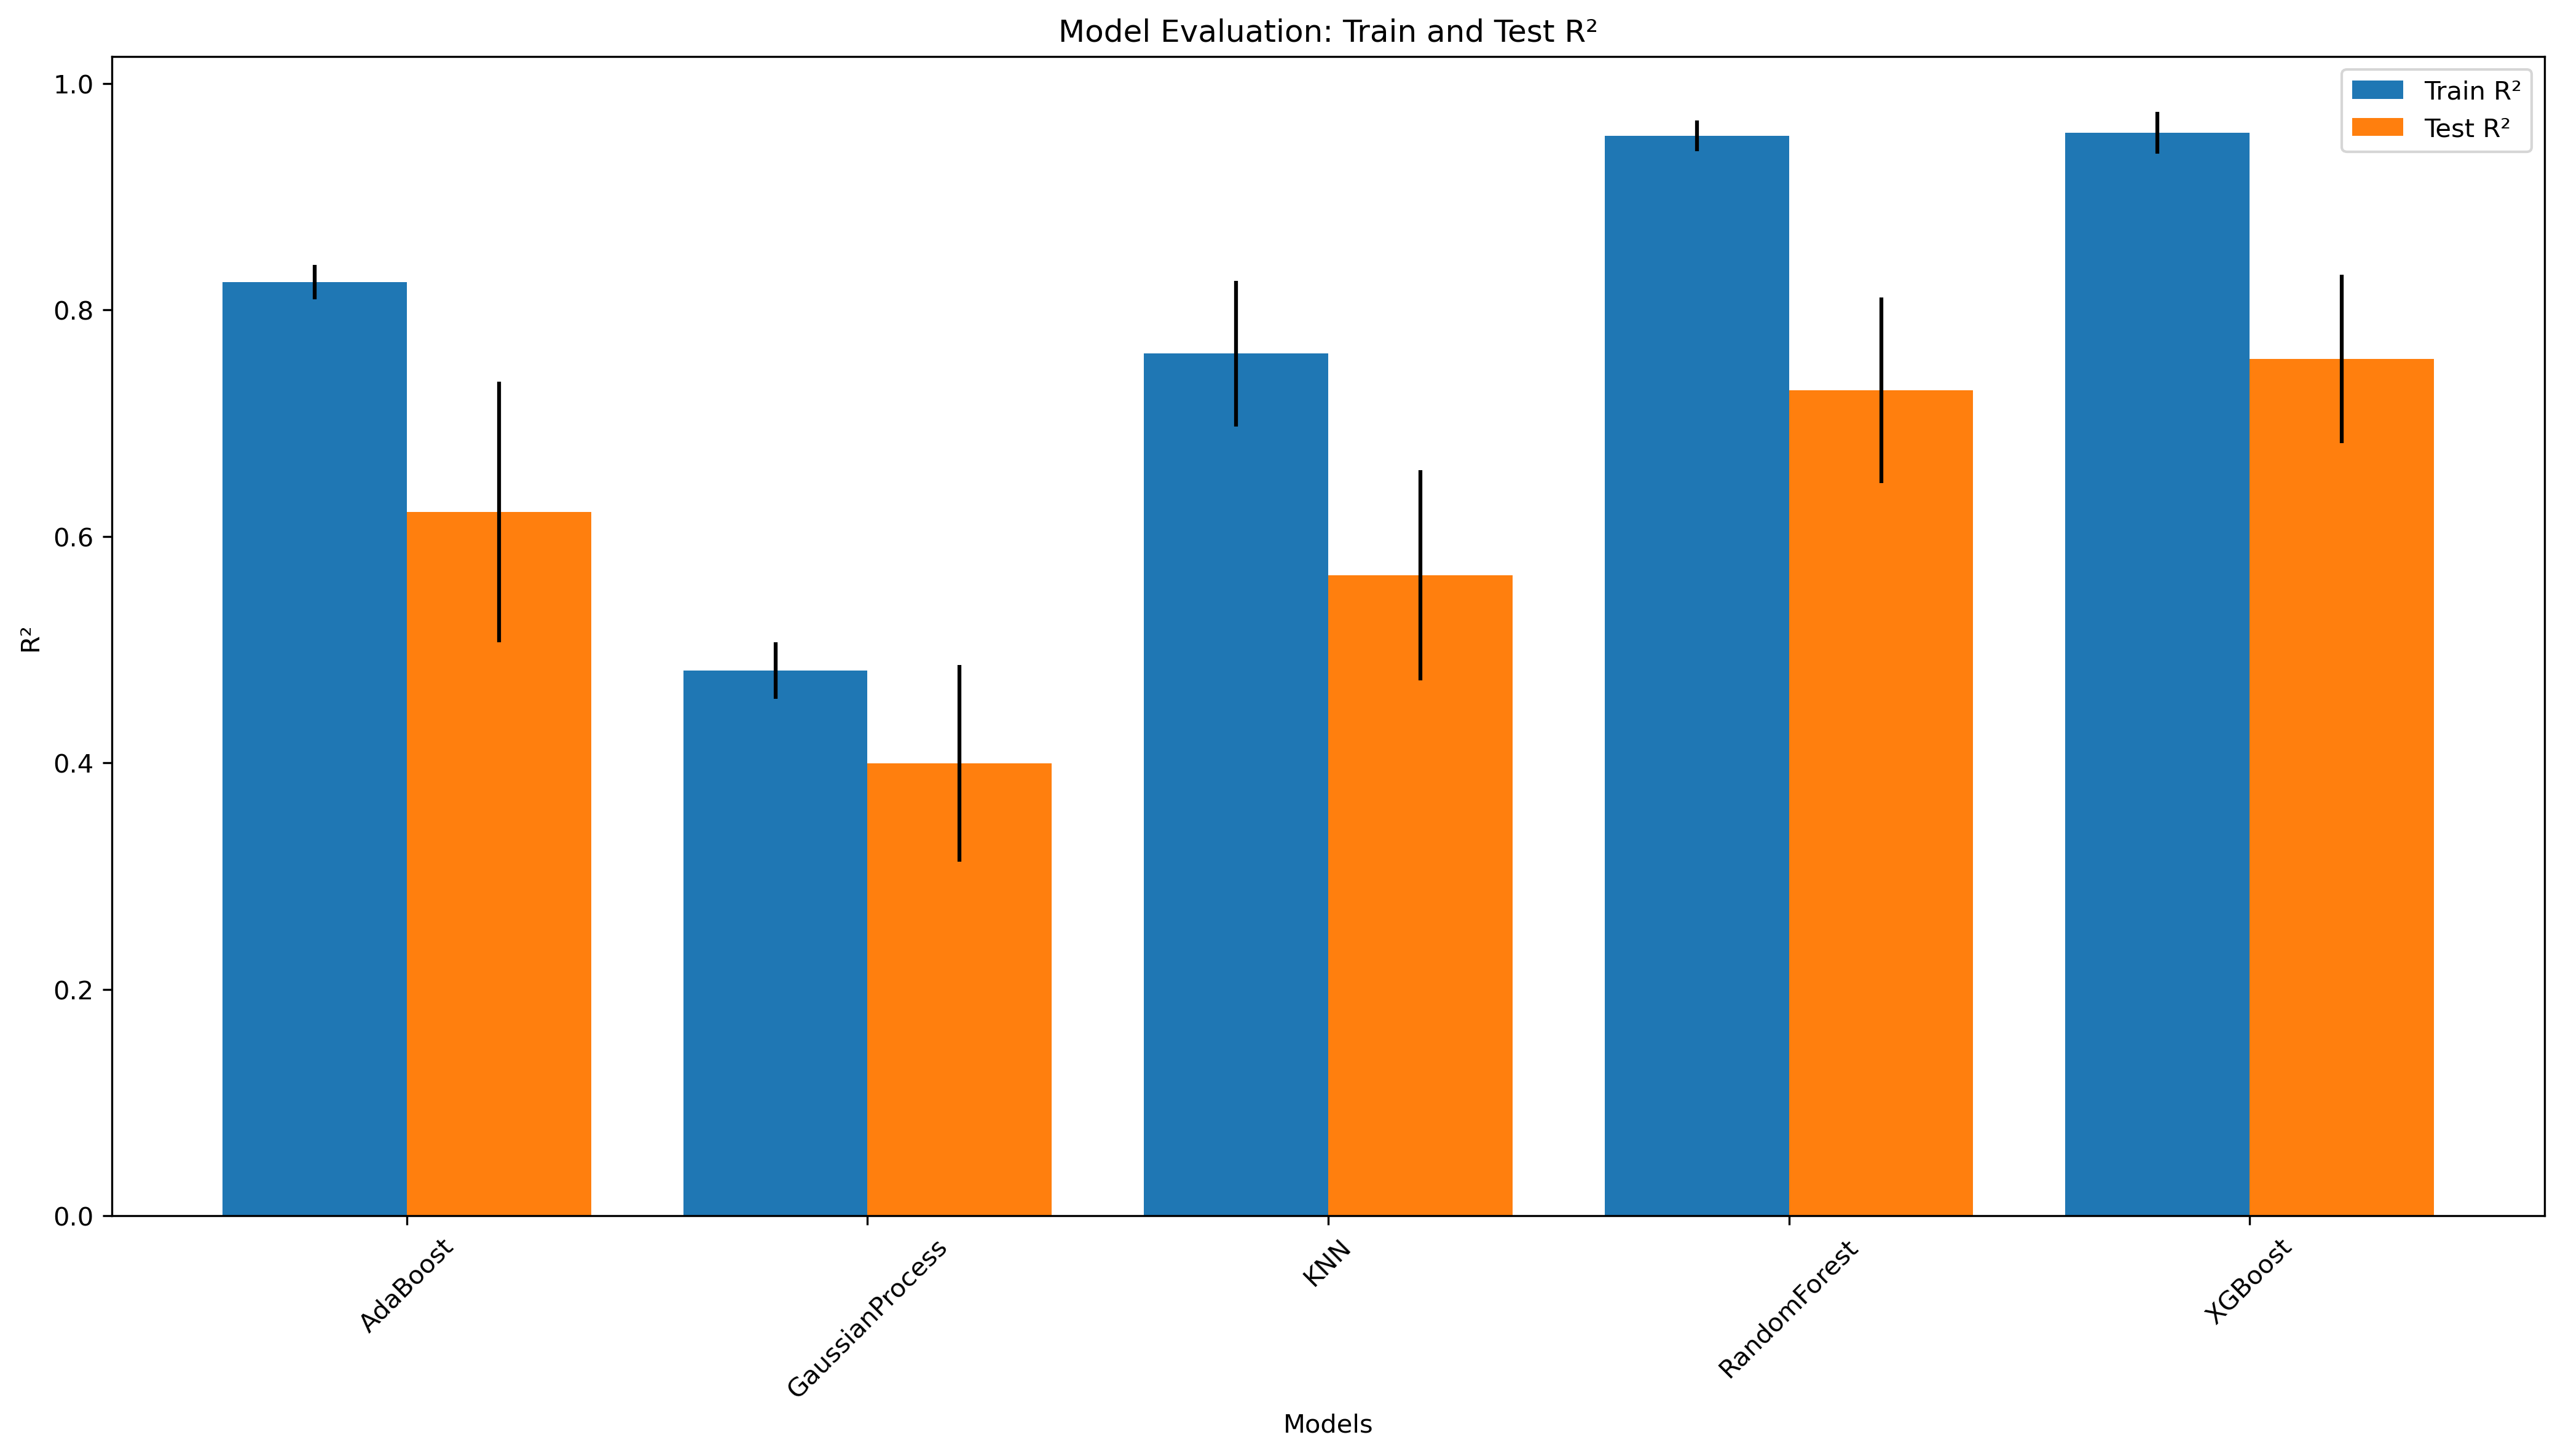

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 读取数据
data = pd.read_excel('UTS.xlsx')
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# 初始化存储结果的数组
results = []

# 随机种子
seeds = range(100)

# 模型列表
models = {
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'XGBoost': xgb.sklearn.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3),
    'GaussianProcess': GaussianProcessRegressor(kernel=C(0.1, (0.001, 0.1)) * RBF(0.5, (1e-4, 10)), n_restarts_optimizer=10, alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# 超参数搜索参数
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 100)},
    'RandomForest': {
        'n_estimators': [50, 75, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 4, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True]
    },
    'XGBoost': {
        'learning_rate': [0.1],
        'n_estimators': [50, 75, 100],
        'max_depth': [1, 2, 3]
    }
}

# 遍历随机种子
for seed in seeds:
    # 切分数据
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
    
    for model_name, model in models.items():
        # 如果模型有超参数搜索
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=10, n_jobs=-1)
            model = grid.fit(x_train, y_train)
            best_params = model.best_params_
        else:
            model.fit(x_train, y_train)
            best_params = {}
        
        # 评估模型
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # 存储结果
        results.append({
            'Seed': seed,
            'Model': model_name,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Best_Params': best_params
        })

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 保存到Excel
results_df.to_excel('model_evaluation_results.xlsx', index=False)

# 计算平均值和标准差
summary_df = results_df.groupby('Model').agg({
    'Train_R2': ['mean', 'std'],
    'Test_R2': ['mean', 'std']
}).reset_index()

summary_df.columns = ['Model', 'Train_R2_Mean', 'Train_R2_Std', 'Test_R2_Mean', 'Test_R2_Std']

# 输出平均值和标准差
print(summary_df)

# 可视化结果
plt.figure(dpi=300, figsize=(14, 8))

# 训练集R²
plt.bar(np.arange(len(summary_df)) - 0.2, summary_df['Train_R2_Mean'], yerr=summary_df['Train_R2_Std'], width=0.4, label='Train R²')
# 测试集R²
plt.bar(np.arange(len(summary_df)) + 0.2, summary_df['Test_R2_Mean'], yerr=summary_df['Test_R2_Std'], width=0.4, label='Test R²')

plt.xlabel('Models')
plt.ylabel('R²')
plt.title('Model Evaluation: Train and Test R²')
plt.xticks(ticks=np.arange(len(summary_df)), labels=summary_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()